In [177]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from scipy import stats
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [178]:
#Set working directory
os.chdir("E:\Project 2")

In [179]:
#Load data
absent = pd.read_excel("Absenteeism_at_work_Project.xls")

In [180]:
#missing value analysis
missing_val=pd.DataFrame(absent.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absent))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv", index = False)

In [181]:
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [182]:
for i in range(5,19):
    absent.iloc[:,i] = absent.iloc[:,i].fillna(absent.iloc[:,i].median())
for i in range(1,3):
    absent.iloc[:,i] = absent.iloc[:,i].fillna(absent.iloc[:,i].median())
absent["Body mass index"]=absent["Body mass index"].fillna(absent["Body mass index"].mean())
absent["Absenteeism time in hours"]=absent["Absenteeism time in hours"].fillna(absent["Absenteeism time in hours"].median())

In [183]:
lis=["Reason for absence","Seasons","Social drinker","Social smoker","Disciplinary failure","Day of the week","Education","ID","Month of absence"]
for i in lis:
    absent[i]=absent[i].astype(object)

In [184]:
absent_copy=absent.copy()

In [185]:
lis1=[]
for i in range(0, absent.shape[1]):
    if(absent.iloc[:,i].dtypes != 'object'):
        lis1.append(absent.columns[i])
lis4=lis1.copy()
del lis4[-1]

In [186]:
lis4

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Body mass index']

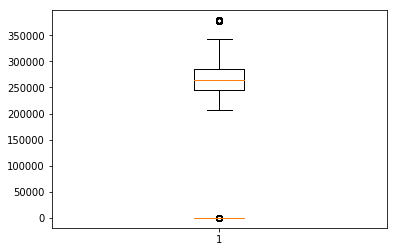

In [187]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
for i in lis1:
    plt.boxplot(absent[i])

In [188]:
#Detect outliers and replace with NA
for i in lis4:
    
    # #Extract quartiles
    q75, q25 = np.percentile(absent.loc[:,i], [75,25])

    # #Calculate IQR
    iqr = q75 - q25

    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    absent.loc[absent.loc[:,i] < minimum,i] = np.nan
    absent.loc[absent.loc[:,i] > maximum,i] = np.nan



In [189]:
pd.DataFrame(absent.isnull().sum())

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,31


In [190]:
#Impute outliers via median method
for i in lis4:
    absent[i]=absent[i].fillna(absent[i].median())

In [191]:
#Correlation plot
absent_corr = absent.loc[:,lis1]

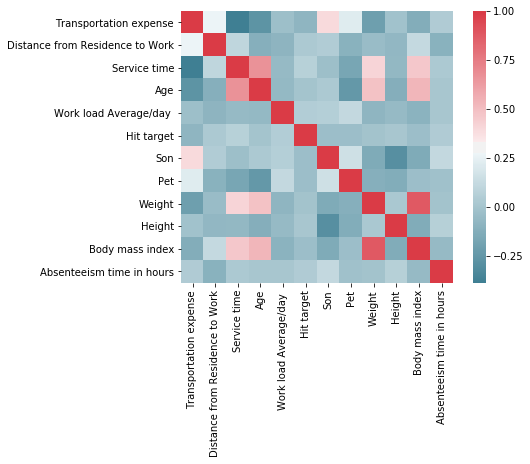

In [192]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = absent_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [193]:
for i in lis:
    print(i)
    print(stats.f_oneway(absent["Absenteeism time in hours"],absent[i]))

Reason for absence
F_onewayResult(statistic=455.3711473915174, pvalue=2.707113523010777e-88)
Seasons
F_onewayResult(statistic=77.43805808135198, pvalue=3.7436356639463614e-18)
Social drinker
F_onewayResult(statistic=165.5086864619558, pvalue=5.582372789491098e-36)
Social smoker
F_onewayResult(statistic=192.82867048087573, pvalue=2.6693616173845234e-41)
Disciplinary failure
F_onewayResult(statistic=194.00177378775473, pvalue=1.5848851694285747e-41)
Day of the week
F_onewayResult(statistic=35.90534534236459, pvalue=2.597843591203105e-09)
Education
F_onewayResult(statistic=129.49899329227654, pvalue=8.030025614992404e-29)
ID
F_onewayResult(statistic=309.0176938153286, pvalue=5.792879146331886e-63)
Month of absence
F_onewayResult(statistic=1.1472281864806217, pvalue=0.28430500959032)


In [194]:
for i in range(0,len(lis)):
    for j in range(i+1,len(lis)):
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(absent[lis[i]], absent[lis[j]]))
        if(p<=0.05):
            print(lis[i],"vs",lis[j])
            print(p)

Reason for absence vs Seasons
7.510464854668837e-22
Reason for absence vs Social drinker
3.7248231481975135e-08
Reason for absence vs Social smoker
2.5924166923672465e-09
Reason for absence vs Disciplinary failure
2.6018039430529264e-123
Reason for absence vs Education
1.2324555671642062e-10
Reason for absence vs ID
2.6547906138415276e-61
Reason for absence vs Month of absence
1.0089174328331495e-18
Seasons vs Disciplinary failure
8.428010096294059e-05
Seasons vs ID
2.3159482085127654e-07
Seasons vs Month of absence
0.0
Social drinker vs Social smoker
0.00849237440232344
Social drinker vs Education
7.846131751409077e-35
Social drinker vs ID
1.7935221070986258e-131
Social drinker vs Month of absence
0.009858659892194975
Social smoker vs Disciplinary failure
0.003240642519906935
Social smoker vs Education
3.677653602021038e-21
Social smoker vs ID
5.93573183725426e-133
Social smoker vs Month of absence
0.02370120704079393
Disciplinary failure vs ID
5.921983292784841e-10
Disciplinary failu

In [195]:
#day of week=7, season=4,socil drik=3,smoke=2,displinary=3,edu=3

In [196]:
abs_final=absent.drop(['ID','Month of absence','Age','Education','Body mass index','Disciplinary failure','Seasons','Social drinker','Social smoker'],axis=1)

In [197]:
#abs_final=absent.drop(['Body mass index','Month of absence'],axis=1)

In [198]:
lis2=lis1.copy()
del lis2[-2]
del lis2[3]

In [199]:
lis2

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Work load Average/day ',
 'Hit target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Absenteeism time in hours']

In [200]:
#Nomalisation

for i in lis2:
    print(i)
    abs_final[i] = (abs_final[i] - min(abs_final[i]))/(max(abs_final[i]) - min(abs_final[i]))


Transportation expense
Distance from Residence to Work
Service time
Work load Average/day 
Hit target
Son
Pet
Weight
Height
Absenteeism time in hours


In [201]:
abs_final

,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Son,Pet,Weight,Height,Absenteeism time in hours
0,26,3,0.657692,0.659574,0.521739,0.244925,0.769231,0.50,0.5,0.653846,0.7,0.033333
1,0,3,0.000000,0.170213,0.739130,0.244925,0.769231,0.25,0.0,0.807692,0.5,0.000000
2,23,4,0.234615,0.978723,0.739130,0.244925,0.769231,0.00,0.0,0.634615,0.5,0.016667
3,7,5,0.619231,0.000000,0.565217,0.244925,0.769231,0.50,0.0,0.230769,0.3,0.033333
4,23,5,0.657692,0.659574,0.521739,0.244925,0.769231,0.50,0.5,0.653846,0.7,0.016667
5,23,6,0.234615,0.978723,0.739130,0.244925,0.769231,0.00,0.0,0.634615,0.5,0.025000
6,22,6,0.411538,1.000000,0.086957,0.244925,0.769231,0.25,0.0,0.461538,0.7,0.066667
7,23,6,0.546154,0.957447,0.434783,0.244925,0.769231,1.00,0.0,0.173077,0.3,0.033333
8,19,2,0.142308,0.148936,0.565217,0.244925,0.769231,0.50,0.0,0.750000,0.5,0.333333
9,22,2,0.450000,0.127660,0.565217,0.244925,0.769231,0.25,0.5,0.615385,0.7,0.066667


In [202]:
# ML Algorithm
## dividing data into train and test
#Import Libraries for decision tree
from sklearn import tree
import random
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
train,test = train_test_split(abs_final,test_size= 0.2)

In [203]:
# Decision Tree Regression

fit_dt = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:11],train.iloc[:,11])

In [204]:
predictions_dt = fit_dt.predict(test.iloc[:,0:11])

In [205]:
from math import sqrt
rmse_dt = sqrt(mean_squared_error(test.iloc[:,11],predictions_dt))
print(rmse_dt)

0.11403326889987404


In [206]:
# Random Tree Regression

rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf.fit(train.iloc[:,0:11],train.iloc[:,11])
predictions_rf = rf.predict(test.iloc[:,0:11])

In [207]:
rmse_dt1 = sqrt(mean_squared_error(test.iloc[:,11],predictions_rf))
print(rmse_dt1)

0.11356290521658134


In [208]:
lis3

['Reason for absence', 'Day of the week']

In [209]:
# Linear regression 

lis3=lis.copy()
del lis3[-1]
del lis3[-1]
del lis3[-1]
del lis3[1:5]
for i in lis3:
    abs_final[i] = abs_final[i].astype('float')
train1,test1 = train_test_split(abs_final,test_size = 0.2)

In [210]:

line_regression = sm.OLS(train1.iloc[:,11],train1.iloc[:,0:11]).fit()
line_regression.summary()
predictions_lr = line_regression.predict(test1.iloc[:,0:11])

In [211]:
line_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.261
Model:                                   OLS   Adj. R-squared:                  0.247
Method:                        Least Squares   F-statistic:                     18.67
Date:                       Tue, 14 Aug 2018   Prob (F-statistic):           3.95e-32
Time:                               20:11:56   Log-Likelihood:                 497.71
No. Observations:                        592   AIC:                            -973.4
Df Residuals:                            581   BIC:                            -925.2
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.0017      0.001     -3.415      0.001      -0.003      -0.001
Day of the week                    -0.0062      0.003     -2.079      0.038      -0.012      -0.000
Transportation expense              0.0261      0.022      1.192      0.234      -0.017       0.069
Distance from Residence to Work    -0.0256      0.016     -1.627      0.104      -0.056       0.005
Service time                        0.0795      0.027      2.908      0.004       0.026       0.133
Work load Average/day               0.0068      0.018      0.372      0.710      -0.029       0.043
Hit target                          0.0320      0.018      1.801      0.072      -0.003       0.067
Son                                 0.0550      0.018      3.017      0.003       0.019       0.091
Pet                                 0.0006      0.013      0.048      0.961      -0.025       0.026
Weight                             -0.0033      0.020     -0.167      0.867      -0.042       0.035
Height                              0.0766      0.024      3.240      0.001       0.030       0.123
==============================================================================
Omnibus:                      689.169   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43152.392
Skew:                           5.704   Prob(JB):                         0.00
Kurtosis:                      43.240   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
rmse_dt = sqrt(mean_squared_error(test1.iloc[:,11],predictions_lr))
print(rmse_dt)

0.11507317538052939


In [38]:
########Loss Calculation########################

loss = absent_copy[['Month of absence','Service time','Work load Average/day ','Absenteeism time in hours']]


In [39]:
loss["loss/month"]=(loss["Absenteeism time in hours"]*loss["Work load Average/day "])/loss["Service time"]

C:\Users\sonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
loss.columns

Index(['Month of absence', 'Service time', 'Work load Average/day ',
       'Absenteeism time in hours', 'loss/month'],
      dtype='object')

In [41]:
month=[]
for j in range(0,13):
    sum=0
    for i in range(0,len(loss)):
        if(loss["Month of absence"].iloc[i]==j):
            sum=sum+loss["loss/month"].iloc[i]
    month.append(sum)
z=pd.DataFrame(month)   

In [42]:
z["Month"]=z.index
z["Loss"]=z[0]

In [43]:
del z[0]

In [44]:
z.iloc[1:len(z),:]

,Month,Loss
1,1,6.312631e+06
2,2,8.268540e+06
3,3,1.607086e+07
4,4,1.099949e+07
5,5,9.693976e+06
6,6,1.447528e+07
7,7,1.910022e+07
8,8,9.059830e+06
9,9,6.658574e+06
10,10,9.218642e+06
